One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector store takes care of storing embedded data and performing vector search for you.

Few Open-Source Vector Stores:
- Chroma
- Pinecone
- FAISS
- Lance

Cosine Similarity or Euclidean Distance

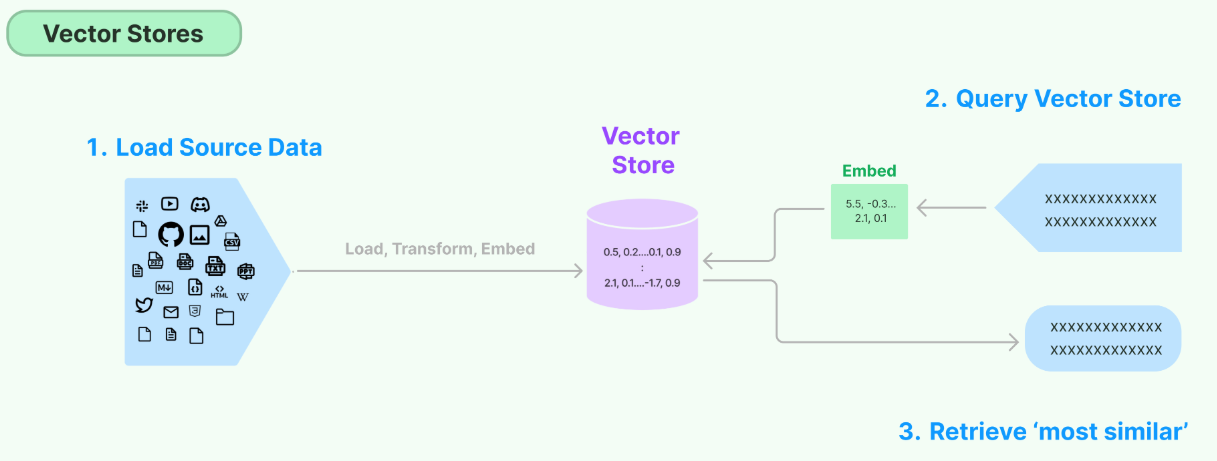

In [1]:
from google.colab import userdata
import os
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

#Document Loading

In [3]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.6 MB/s eta 0:00:00


In [14]:
!pip install pypdf tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.6 MB/s eta 0:00:00


In [6]:
document = "attention.pdf"

In [10]:
from langchain.document_loaders import PyPDFLoader

# Load and split documents
loader = PyPDFLoader(document)
docs = loader.load()

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=20)
doc_chunks = splitter.split_documents(docs)

#FAISS

Optimized for fast nearest-neighbor search on large-scale datasets.

Primarily used for vector similarity search.

Supports GPU acceleration for high-speed computations.

**When to Use FAISS**


* Large-Scale Similarity Search: FAISS is optimized for searching millions to billions of vectors.

* Image or Video Search: Used in content-based retrieval (e.g., finding similar images).

* Recommendation Systems: Helps in personalized recommendations based on embeddings.

* High-Performance Applications: When ultra-fast nearest-neighbor search is needed.

**Example:**

Imagine a fashion e-commerce platform where users upload an image of a dress, and the system finds similar dresses. FAISS can handle millions of product embeddings efficiently.

In [2]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 58.8 MB/s eta 0:00:00


In [11]:
from langchain.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [15]:
# Convert text to embeddings
embedding_model = OpenAIEmbeddings()
vectorstore = FAISS.from_documents(doc_chunks, embedding_model)

##Perform Similarity Search

In [16]:
query = "explain about encoder ina attention?"

In [17]:
query_embedding = embedding_model.embed_query(query)

In [18]:
retrieved_docs = vectorstore.similarity_search(query)

In [19]:
for doc in retrieved_docs:
    print(doc.page_content)

encoder.
performing models also connect the encoder and decoder through an attention
layer in a typical sequence transduction encoder or decoder. Motivating our use of self-attention
typical encoder-decoder attention mechanisms in sequence-to-sequence models such as
[38, 2, 9].


##Retrievers

Retrievers provide Easy way to combine documents with language models.


A retriever is an interface that returns documents given an unstructured query. It is more general than a vector store. A retriever does not need to be able to store documents, only to return (or retrieve) them. Retriever stores data for it to be queried by a language model. It provides an interface that will return documents based on an unstructured query. Vector stores can be used as the backbone of a retriever, but there are other types of retrievers as well.



There are many different types of retrievers, the most widely supported is the VectoreStoreRetriever.


In [20]:
retriever = vectorstore.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 2},
)

In [21]:
docs_retriever = retriever.batch(["encoder", "decoder"])

In [22]:
docs_retriever

[[Document(id='4aad67fa-9411-4eb5-97d4-966dbba3ec41', metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2023-08-03T00:07:29+00:00', 'author': '', 'keywords': '', 'moddate': '2023-08-03T00:07:29+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'attention.pdf', 'total_pages': 15, 'page': 4, 'page_label': '5'}, page_content='encoder.'),
  Document(id='c1d17dd6-e771-44ba-8b1f-d6f0bc61db40', metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2023-08-03T00:07:29+00:00', 'author': '', 'keywords': '', 'moddate': '2023-08-03T00:07:29+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'attention.pdf', 'total_pages': 15, 'page': 1, 'page_label': '2'}, page_content='lang

In [23]:
type(docs_retriever)

list

In [24]:
len(docs_retriever)

2

In [25]:
docs_retriever1 = docs_retriever[0]

In [26]:
docs_retriever1

[Document(id='4aad67fa-9411-4eb5-97d4-966dbba3ec41', metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2023-08-03T00:07:29+00:00', 'author': '', 'keywords': '', 'moddate': '2023-08-03T00:07:29+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'attention.pdf', 'total_pages': 15, 'page': 4, 'page_label': '5'}, page_content='encoder.'),
 Document(id='c1d17dd6-e771-44ba-8b1f-d6f0bc61db40', metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2023-08-03T00:07:29+00:00', 'author': '', 'keywords': '', 'moddate': '2023-08-03T00:07:29+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'attention.pdf', 'total_pages': 15, 'page': 1, 'page_label': '2'}, page_content='langua

In [27]:
docs_retriever1[0].page_content

'encoder.'

In [28]:
docs_retriever1[1].page_content

'language models and encoder-decoder'

#CHROMA DB

**When to Use ChromaDB**


* Retrieval-Augmented Generation (RAG): Enhances LLMs like GPT by fetching relevant context.

* Conversational AI: Stores chat history embeddings and retrieves relevant messages.

* Document Search with Metadata: Filtering documents based on attributes (e.g., date, category).

* AI-Driven Applications: When you need a persistent, structured vector database.

**Example: **


A legal AI assistant uses ChromaDB to store legal case embeddings along with metadata (case name, date, relevance score). When a user asks a legal question, the assistant retrieves the most relevant cases.

A persistent vector database designed for AI applications.

Built with metadata filtering and easy-to-use APIs.

Integrates well with LLMs (Large Language Models) for retrieval-augmented generation (RAG).

Stores embeddings along with additional metadata, making it more flexible.

In [31]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.7 MB/s eta 0:00:

In [32]:
from langchain.vectorstores import Chroma

In [33]:
chroma = Chroma.from_documents(doc_chunks, embedding_model)

##Perform Similarity Search

In [34]:
query = "explain about encoder ina attention?"

In [35]:
query_embedding = embedding_model.embed_query(query)

In [36]:
similarity_docs = chroma.similarity_search(query)

In [37]:
for doc in similarity_docs:
    print(doc.page_content)

encoder.
performing models also connect the encoder and decoder through an attention
layer in a typical sequence transduction encoder or decoder. Motivating our use of self-attention
typical encoder-decoder attention mechanisms in sequence-to-sequence models such as
[38, 2, 9].


##Retrievers

In [38]:
retriever = chroma.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 2},
)

In [46]:
encoder_retrieved_docs = retriever.get_relevant_documents("encoder")

<ipython-input-46-a11070305cdb>:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  encoder_retrieved_docs = retriever.get_relevant_documents("encoder")


In [47]:
encoder_retrieved_docs

[Document(metadata={'author': '', 'creationdate': '2023-08-03T00:07:29+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2023-08-03T00:07:29+00:00', 'page': 4, 'page_label': '5', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'attention.pdf', 'subject': '', 'title': '', 'total_pages': 15, 'trapped': '/False'}, page_content='encoder.'),
 Document(metadata={'author': '', 'creationdate': '2023-08-03T00:07:29+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2023-08-03T00:07:29+00:00', 'page': 1, 'page_label': '2', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'attention.pdf', 'subject': '', 'title': '', 'total_pages': 15, 'trapped': '/False'}, page_content='language models and encoder-decoder')]

In [39]:
chroma_retriever = retriever.batch(["encoder", "decoder"])

In [40]:
chroma_retriever

[[Document(metadata={'author': '', 'creationdate': '2023-08-03T00:07:29+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2023-08-03T00:07:29+00:00', 'page': 4, 'page_label': '5', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'attention.pdf', 'subject': '', 'title': '', 'total_pages': 15, 'trapped': '/False'}, page_content='encoder.'),
  Document(metadata={'author': '', 'creationdate': '2023-08-03T00:07:29+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2023-08-03T00:07:29+00:00', 'page': 1, 'page_label': '2', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'attention.pdf', 'subject': '', 'title': '', 'total_pages': 15, 'trapped': '/False'}, page_content='language models and encoder-decoder')],
 [Document(metadata={'author': '', 'creationdate':

In [42]:
doc1 = chroma_retriever[0]

In [43]:
doc1

[Document(metadata={'author': '', 'creationdate': '2023-08-03T00:07:29+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2023-08-03T00:07:29+00:00', 'page': 4, 'page_label': '5', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'attention.pdf', 'subject': '', 'title': '', 'total_pages': 15, 'trapped': '/False'}, page_content='encoder.'),
 Document(metadata={'author': '', 'creationdate': '2023-08-03T00:07:29+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2023-08-03T00:07:29+00:00', 'page': 1, 'page_label': '2', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'attention.pdf', 'subject': '', 'title': '', 'total_pages': 15, 'trapped': '/False'}, page_content='language models and encoder-decoder')]

In [44]:
doc1[0].page_content

'encoder.'

In [45]:
doc1[1].page_content

'language models and encoder-decoder'

#Comparision of FAISS & Chroma DB

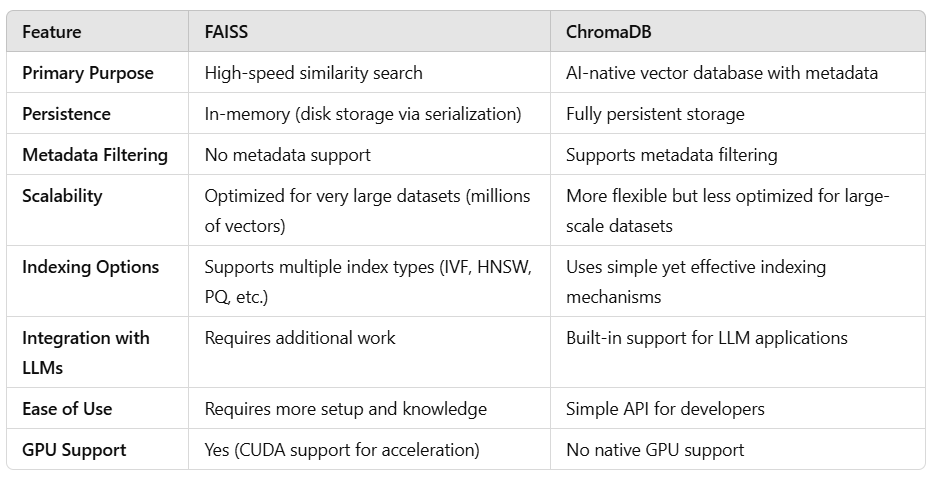

* Choose **FAISS** if you need fast, large-scale similarity search and can handle indexing complexity.

* Choose **ChromaDB** if you need an AI-friendly, persistent, and metadata-supported vector database.